# Factor Model Project

## 05/03/2024

Ju Hyung Kang

jk8448

In [2]:
import pandas as pd

df = pd.read_csv('return_data.csv')
print(df.head())

          ID        date  Total Return  Specific Risk  20-Day ADV    Growth  \
0  11JMZFSN8  1998-01-02     -0.060465      62.171901     7467336  0.610272   
1  11JS8VT41  1998-01-02      0.000000      37.705799     4636298  1.044603   
2  11NSZA7T1  1998-01-02     -0.003540      38.329513     3920738 -0.110977   
3  122JHRL77  1998-01-02     -0.011834      25.069789       65048 -0.156014   
4  12ULRB8M7  1998-01-02      0.012552      41.183064     1436133  0.923330   

   Volatility  Profitability  Dividend Yield     Value  Market Sensitivity  \
0    1.483404      -3.348269       -1.044360 -0.796163            0.742236   
1    0.719389       0.154666       -1.044360 -0.074093           -0.014233   
2    1.101480      -0.405215       -1.044360 -3.246199           -0.743466   
3   -0.531706      -0.169127        0.406568  1.168001           -0.377473   
4    0.358930      -0.023051       -1.044360  0.564086            0.025626   

   Medium-Term Momentum  Short-Term Momentum  Liquidity 

# PART 1

## a. Plot the number of assets per date.

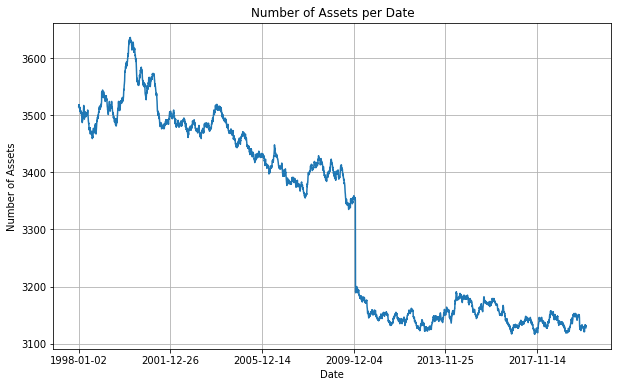

In [2]:
import matplotlib.pyplot as plt

assets_per_date = df.groupby('date').size()

# Plot the number of assets per date
assets_per_date.plot(kind='line', figsize=(10, 6))
plt.title('Number of Assets per Date')
plt.xlabel('Date')
plt.ylabel('Number of Assets')
plt.grid(True)
plt.show()

In [3]:
for i in range(len(assets_per_date)-1):
    if abs(assets_per_date[i]-assets_per_date[i+1]) > 100:
        print(assets_per_date.index[i], assets_per_date[i])
        print(assets_per_date.index[i+1], assets_per_date[i+1])

2009-12-31 3352
2010-01-04 3191


## Propose a criterion to accommodate a changing estimation universe.

In [4]:
df['20-Day ADV'].describe()/1e+06

count       18.381604
mean        39.607655
std        162.520945
min          0.000000
25%          1.139281
50%          5.392872
75%         24.236031
max      17423.856518
Name: 20-Day ADV, dtype: float64

There are data points with the minimum value of 0. The stocks are obviously untradable at those points, but we cannot just omit the stocks since it can cause a survivorship bias. For example, we should not omit *122JHRL77*:

In [5]:
df[df['ID']=='122JHRL77'][:5]

,ID,date,Total Return,Specific Risk,20-Day ADV,Growth,Volatility,Profitability,Dividend Yield,Value,Market Sensitivity,Medium-Term Momentum,Short-Term Momentum,Liquidity
3,122JHRL77,1998-01-02,-0.011834,25.069789,65048,-0.156014,-0.531706,-0.169127,0.406568,1.168001,-0.377473,1.274657,-0.091079,-0.118637
3518,122JHRL77,1998-01-05,0.000000,24.908540,97154,-0.155915,-0.546917,-0.168342,0.407620,1.162848,-0.373202,1.276234,-0.001611,-0.082557
7035,122JHRL77,1998-01-06,0.000000,24.907517,96209,-0.156665,-0.557030,-0.169042,0.407814,1.161979,-0.369457,1.279992,0.016609,-0.110087
10553,122JHRL77,1998-01-07,0.003992,24.431757,95749,-0.154973,-0.561758,-0.167875,0.403825,1.160677,-0.361745,1.281782,-0.035346,-0.089930
14071,122JHRL77,1998-01-08,-0.017893,24.580026,113808,-0.154201,-0.564998,-0.167481,0.403680,1.159601,-0.352916,1.280034,0.093301,-0.056478


In [6]:
df[df['ID']=='122JHRL77'][-5:]

,ID,date,Total Return,Specific Risk,20-Day ADV,Growth,Volatility,Profitability,Dividend Yield,Value,Market Sensitivity,Medium-Term Momentum,Short-Term Momentum,Liquidity
9680879,122JHRL77,2009-02-03,0.00,141.936884,0,0.186527,1.008851,-0.781813,-0.754147,0.986263,-0.334756,-1.927297,3.973835,-2.181783
9684272,122JHRL77,2009-02-04,0.00,142.950609,0,0.194182,1.041953,-0.782242,-0.749705,0.988672,-0.338409,-1.912894,3.246454,-2.081206
9687669,122JHRL77,2009-02-05,0.00,142.123231,0,0.194892,1.079002,-0.794715,-0.742278,0.987879,-0.350355,-1.887411,0.777495,-2.072415
9691067,122JHRL77,2009-02-06,0.00,141.310438,0,0.192723,1.099274,-0.802475,-0.739005,0.993679,-0.345107,-1.862007,0.743654,-2.109398
9694460,122JHRL77,2009-02-09,-0.75,140.773039,111,0.183223,1.135279,-0.807782,-0.732482,1.002413,-0.329233,-1.760323,-0.221518,-2.175373


If we include a stock in universe based on a single threshold, the liquidation pressure would be high if a stock is positioned around the threshold. Thus, I propose 'Knock-In Knock-Out' method. If the criterion is above a certain level, we include the stock in universe, while we exclude the stock when the criterion goes below a certain level. This method can be coherently applied in production easily.

C:\Users\kangj\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


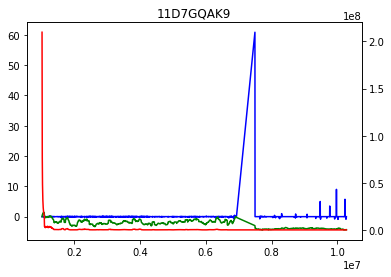

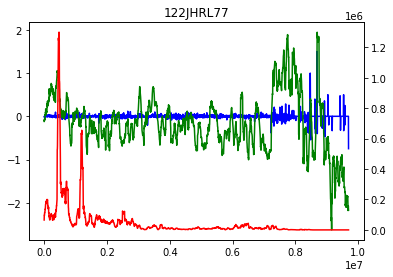

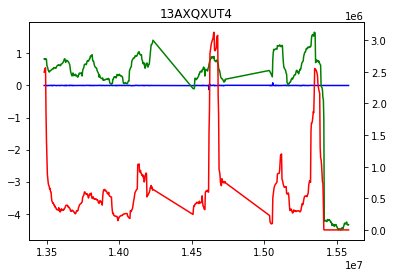

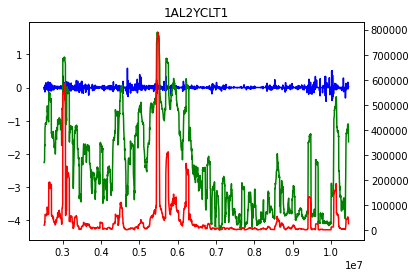

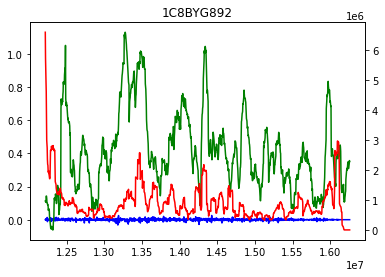

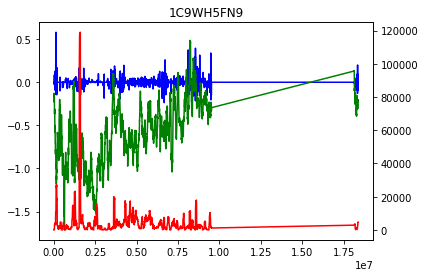

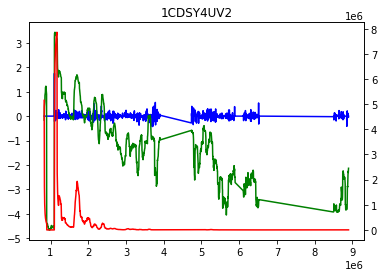

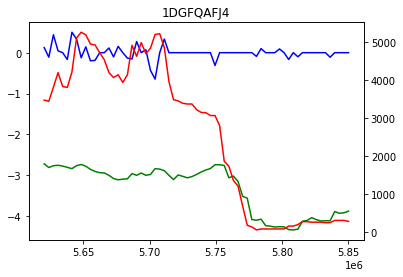

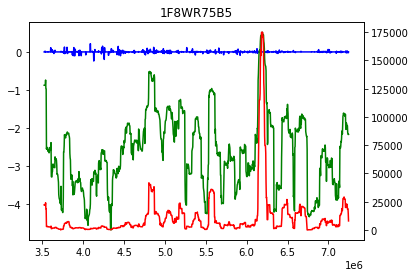

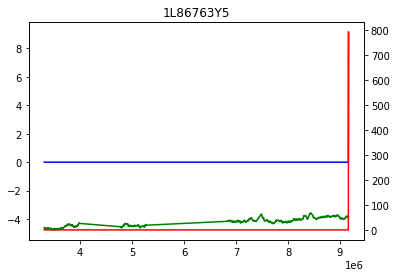

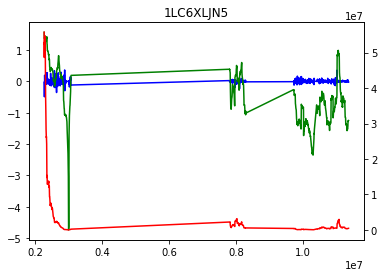

In [7]:
import numpy as np
import statsmodels.api as sm

grouped = df.groupby('ID')

i = 0
for ID, group_df in grouped:
    if any(group_df['20-Day ADV'].values < 100):
        fig, ax1 = plt.subplots()

        ax1.plot(group_df['Total Return'], color='blue', label="return")
        ax1.plot(group_df['Liquidity'], color='green', label='liquidity')
        ax2 = ax1.twinx()

        ax2.plot(group_df['20-Day ADV'], color='red', label="volume")

        plt.title(f"{ID}")
        plt.show()
        i += 1
        
    if i > 10:
        break
    


For a criterion, the Liquidity factor and the 20-Day ADV seems related to the illiquidity and untradability of a stock upon looking at the plots above.

In [3]:
from tqdm import tqdm
import numpy as np

grouped = df.groupby('date')

In [4]:
universe_dict_LIQ = {}

isInitPoint = True
prev_date = None

for date, group_df in tqdm(grouped):
    if isInitPoint:
        universe = set()
    else:
        universe = universe_dict_LIQ[prev_date].copy()
    
    ADV = group_df['20-Day ADV'].values
    ID = group_df['ID'].values
    LIQ = group_df['Liquidity'].values
    
    # Filter gone ID
    universe -= universe - set(ID)
    
    # Add if liquid
    if isInitPoint:
        # Start with 90% of stocks
        universe |= (set(ID[LIQ > np.percentile(LIQ, 10)])) - universe
    else:
        # Knock in if more liquid than the 1st quartile
        universe |= (set(ID[LIQ > np.percentile(LIQ, 25)])) - universe    
    
    # Remove if illiquid
    universe -= (set(ID[LIQ < np.percentile(LIQ, 3)])) & universe
    
    universe_dict_LIQ[date] = universe
    prev_date = date
    isInitPoint = False

list(universe_dict_LIQ[list(universe_dict_LIQ.keys())[0]])[:10]

100%|█████████████████████████████████████████████████████████████████████████████| 5535/5535 [00:09<00:00, 569.72it/s]


['22QNPZV73',
 'FU9Z87YD4',
 'TPML3VFB3',
 '8M6NLGKU2',
 'YAFRLB330',
 'AZSTG4KG7',
 'MLL9PMVU3',
 'GNNRY6TB4',
 'CL1G4PR31',
 'ML6DWRHY0']

In [10]:
universe_dict_ADV = {}

isInitPoint = True
prev_date = None

for date, group_df in tqdm(grouped):
    if isInitPoint:
        universe = set()
    else:
        universe = universe_dict_ADV[prev_date].copy()
    
    ADV = group_df['20-Day ADV'].values
    ID = group_df['ID'].values
    LIQ = group_df['Liquidity'].values
    
    # Filter gone ID
    universe -= universe - set(ID)
    
    # Add if liquid
    if isInitPoint:
        # Start with top 90% of stocks
        universe |= (set(ID[ADV > np.percentile(ADV, 10)])) - universe
    else:
        # Knock in if more liquid than the 1st quartile
        universe |= (set(ID[ADV > np.percentile(ADV, 25)])) - universe   
    
    # Remove if illiquid
    universe -= set(ID[ADV < np.percentile(ADV, 3)]) & universe
    
    universe_dict_ADV[date] = universe
    prev_date = date
    isInitPoint = False

list(universe_dict_ADV[list(universe_dict_ADV.keys())[0]])[:10]

100%|█████████████████████████████████████████████████████████████████████████████| 5535/5535 [00:10<00:00, 534.87it/s]


['2NBPP2B16',
 'HJLTDRZK0',
 'XRGWCVVG8',
 'YAQB3WZB4',
 '3MPV4F528',
 'F6AH1KGF8',
 'TRQRBSL64',
 'PPBNTWBY9',
 'RJMRGDBR1',
 'YNV2L6YT9']

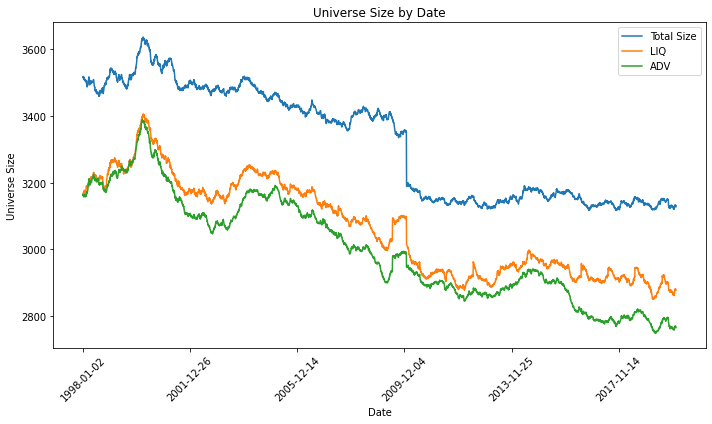

In [11]:
from datetime import datetime

sorted_dates = sorted(universe_dict_LIQ.keys(), key=lambda x: datetime.strptime(x, '%Y-%m-%d'))
element_counts_LIQ = [len(universe_dict_LIQ[date]) for date in sorted_dates]
element_counts_ADV = [len(universe_dict_ADV[date]) for date in sorted_dates]

plt.figure(figsize=(10, 6))

# Total assets
assets_per_date = df.groupby('date').size()
assets_per_date.plot(kind='line', figsize=(10, 6), label='Total Size')

plt.plot(element_counts_LIQ, label='LIQ')
plt.plot(element_counts_ADV, label='ADV')

plt.xlabel('Date')
plt.ylabel('Universe Size')
plt.title('Universe Size by Date')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()

In [12]:
print("LIQ vol", np.std(element_counts_LIQ))
print("ADV vol", np.std(element_counts_ADV))

LIQ vol 142.43683940370897
ADV vol 157.97139463513105


For both factors, we included 90% of assets when starting, included a stock if larger than the first quartile of a factor, and excluded a stock if lower than 3% percentile of a factor. Overall, the size plots are similar when using the **Liquidaty** factor and the **20-Day ADV**. Since the volatility of universe size over days is lower when using the **Liquidity** factor, use the **Liquidity** as a criterion factor. If the **Liquidity** factor is not available in the production, we can use the **20-Day ADV** as proxy.

In [13]:
universe = set()

for uni in universe_dict_LIQ.values():
    universe |= uni

len(universe)

9488

#### Winsorization

Do not winsorize the data since we properly selected universe.

## b. Perform a fundamental factor model using the available factors.

In [14]:
import numpy as np
import statsmodels.api as sm

factors = ['Growth',  'Volatility', 'Profitability', 'Dividend Yield', 'Value', 
           'Market Sensitivity', 'Medium-Term Momentum', 'Short-Term Momentum', 'Liquidity']
grouped = df.groupby('date')
dates = df['date'].drop_duplicates().values

# Model Data
m = len(factors)
T = len(dates)

F = np.zeros((m, T))
e = {}

i = 0
for date, group_df in tqdm(grouped):
    df_temp = group_df[group_df['ID'].isin(universe_dict_LIQ[date])]
    
    X = df_temp[factors].values
    y = df_temp['Total Return'].values
    W = np.diag(1 / df_temp['Specific Risk'])
    
    f = np.linalg.inv(X.T @ W @ X) @ X.T @ W @ y
    F[:, i] = f
    e[date] = y - (X @ f.reshape(-1, 1)).flatten()
    
    i += 1

100%|██████████████████████████████████████████████████████████████████████████████| 5535/5535 [04:38<00:00, 19.85it/s]


In [15]:
F[:,0]

array([-2.26148797e-03,  4.52090575e-03, -3.84596472e-04,  1.89255100e-04,
        1.33155243e-03,  4.07875607e-03, -8.01825887e-03, -4.13259832e-04,
       -2.18513769e-05])

In [16]:
e['1998-01-02']

array([-0.06030327,  0.00841141, -0.00448605, ..., -0.00080998,
       -0.04290043,  0.01411975])

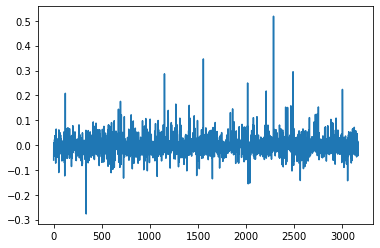

In [17]:
plt.plot(e['1998-01-02'])
plt.show()

## c. Plot daily turnover of each factor over time.

In [18]:
turnovers = []
prev_df = None

for date, group_df in tqdm(grouped):
    if prev_df is None:
        df_temp = group_df[group_df['ID'].isin(universe_dict_LIQ[date])]
        
        B = df_temp[factors].copy()
        B.loc[:, 'ID'] = df_temp['ID'].values
        
        prev_df = B
    else:
        df_temp = group_df[group_df['ID'].isin(universe_dict_LIQ[date])]
        
        B = df_temp[factors].copy()
        B.loc[:, 'ID'] = df_temp['ID'].values
        curr_df = B
        
        df_B = pd.merge(curr_df, prev_df, on='ID', how='inner')
        
        curr = df_B[[x+'_x' for x in factors]]
        new_cols = {x:y for (x, y) in zip([x+'_x' for x in factors], factors)}
        curr = curr.rename(columns=new_cols)
        
        prev = df_B[[x+'_y' for x in factors]]
        new_cols = {x:y for (x, y) in zip([x+'_y' for x in factors], factors)}
        prev = prev.rename(columns=new_cols)
        
        turnover = np.sum((curr - prev)**2, axis=0) / np.sum(prev**2, axis=0)
        turnovers.append(turnover)
        prev_df = curr_df

100%|██████████████████████████████████████████████████████████████████████████████| 5535/5535 [01:10<00:00, 79.03it/s]


In [19]:
turnovers = pd.DataFrame(turnovers, columns=factors)
turnovers

,Growth,Volatility,Profitability,Dividend Yield,Value,Market Sensitivity,Medium-Term Momentum,Short-Term Momentum,Liquidity
0,2.817249e-07,0.000758,8.511852e-07,0.000070,0.000399,0.000728,0.001175,0.147980,0.016242
1,1.852334e-06,0.000836,2.643765e-06,0.000166,0.000047,0.000847,0.001118,0.142163,0.004307
2,7.413875e-03,0.000854,6.546423e-07,0.000327,0.000119,0.000812,0.001163,0.133574,0.009545
3,2.743462e-06,0.000930,8.972714e-06,0.000065,0.000112,0.000880,0.001080,0.116815,0.007488
4,3.899084e-06,0.001061,9.282709e-07,0.000034,0.000105,0.001622,0.001049,0.125780,0.006962
...,...,...,...,...,...,...,...,...,...
5529,1.516606e-04,0.000466,2.720613e-07,0.000042,0.000026,0.000348,0.001026,0.102018,0.000393
5530,4.190246e-07,0.000459,6.822991e-07,0.000776,0.000146,0.000282,0.000865,0.087985,0.007919
5531,1.705301e-07,0.000465,5.144701e-05,0.000096,0.000144,0.000224,0.000921,0.084082,0.002391
5532,6.507574e-03,0.000458,4.073731e-07,0.002792,0.000070,0.000156,0.001047,0.078950,0.001827


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:05<00:00,  1.56it/s]


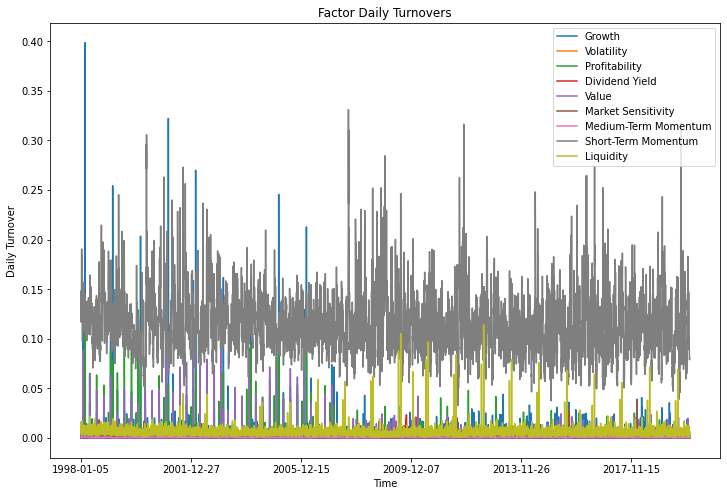

In [20]:
plt.figure(figsize=(12,8))
for f in tqdm(turnovers.columns):
    plt.plot(dates[1:], turnovers[f], label=f)
plt.xticks(np.arange(0, len(dates), 1000))
plt.xlabel('Time')
plt.ylabel('Daily Turnover')
plt.title('Factor Daily Turnovers')
plt.legend()
plt.show()

## Sort factors from lowest turnover to higher turnover and determine a cluster of lower-turnover and high-turnover factors.

In [21]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=1)
kmeans.fit(turnovers.T)
clusters = kmeans.labels_
for x in zip(factors, clusters):
    print(x)

('Growth', 0)
('Volatility', 0)
('Profitability', 0)
('Dividend Yield', 0)
('Value', 0)
('Market Sensitivity', 0)
('Medium-Term Momentum', 0)
('Short-Term Momentum', 1)
('Liquidity', 0)


## d. Orthogonalize high-turnover factors to lower-turnover ones.

In [5]:
high = 'Short-Term Momentum'
lows = ['Growth',  'Volatility', 'Profitability', 'Dividend Yield', 'Value', 
           'Market Sensitivity', 'Medium-Term Momentum', 'Liquidity']

In [6]:
import statsmodels.api as sm

factors = ['Growth',  'Volatility', 'Profitability', 'Dividend Yield', 'Value', 
           'Market Sensitivity', 'Medium-Term Momentum', 'Short-Term Momentum', 'Liquidity']
dates = df['date'].drop_duplicates().values

B_new = {}    
    
for date, group_df in tqdm(grouped):
    df_temp = group_df[group_df['ID'].isin(universe_dict_LIQ[date])]
    
    X = df_temp[lows].values
    y = df_temp[high].values
    
    model = sm.WLS(y, X)
    result = model.fit()
    
    df_factors = df_temp[factors].copy()
    df_factors.loc[:, high] = result.resid
    
    B_new[date] = df_factors

C:\Users\kangj\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
100%|█████████████████████████████████████████████████████████████████████████████| 5535/5535 [00:38<00:00, 143.66it/s]


In [11]:
for x in lows:
    print(np.dot(B_new[dates[0]][x], B_new[dates[0]][high]))

2.9684588120915123e-13
1.295907825493714e-13
4.823398624953512e-14
-1.3739009929736312e-13
-2.0805579481475434e-13
7.934208845483681e-13
-8.942846463355636e-14
4.447275880892221e-13


### Turnover after orthogonalization

In [33]:
turnovers = []
prev_df = None

for date, group_df in tqdm(grouped):
    if prev_df is None:
        df_temp = group_df[group_df['ID'].isin(universe_dict_LIQ[date])]
        
        B = B_new[date].copy()
        B.loc[:, 'ID'] = df_temp['ID'].values
        
        prev_df = B
    else:
        df_temp = group_df[group_df['ID'].isin(universe_dict_LIQ[date])]
        
        B = B_new[date].copy()
        B.loc[:, 'ID'] = df_temp['ID'].values
        curr_df = B
        
        df_B = pd.merge(curr_df, prev_df, on='ID', how='inner')
        
        curr = df_B[[x+'_x' for x in factors]]
        new_cols = {x:y for (x, y) in zip([x+'_x' for x in factors], factors)}
        curr = curr.rename(columns=new_cols)
        prev = df_B[[x+'_y' for x in factors]]
        new_cols = {x:y for (x, y) in zip([x+'_y' for x in factors], factors)}
        prev = prev.rename(columns=new_cols)
        
        turnover = np.sum((curr - prev)**2, axis=0) / np.sum(prev**2, axis=0)
        turnovers.append(turnover)
        prev_df = curr_df

100%|██████████████████████████████████████████████████████████████████████████████| 5535/5535 [01:49<00:00, 50.36it/s]


In [34]:
turnovers = pd.DataFrame(turnovers, columns=factors)
turnovers

,Growth,Volatility,Profitability,Dividend Yield,Value,Market Sensitivity,Medium-Term Momentum,Short-Term Momentum,Liquidity
0,2.817249e-07,0.000758,8.511852e-07,0.000070,0.000399,0.000728,0.001175,0.161389,0.016242
1,1.852334e-06,0.000836,2.643765e-06,0.000166,0.000047,0.000847,0.001118,0.144876,0.004307
2,7.413875e-03,0.000854,6.546423e-07,0.000327,0.000119,0.000812,0.001163,0.139593,0.009545
3,2.743462e-06,0.000930,8.972714e-06,0.000065,0.000112,0.000880,0.001080,0.132534,0.007488
4,3.899084e-06,0.001061,9.282709e-07,0.000034,0.000105,0.001622,0.001049,0.137046,0.006962
...,...,...,...,...,...,...,...,...,...
5529,1.516606e-04,0.000466,2.720613e-07,0.000042,0.000026,0.000348,0.001026,0.117434,0.000393
5530,4.190246e-07,0.000459,6.822991e-07,0.000776,0.000146,0.000282,0.000865,0.099484,0.007919
5531,1.705301e-07,0.000465,5.144701e-05,0.000096,0.000144,0.000224,0.000921,0.089971,0.002391
5532,6.507574e-03,0.000458,4.073731e-07,0.002792,0.000070,0.000156,0.001047,0.081450,0.001827


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:04<00:00,  1.82it/s]


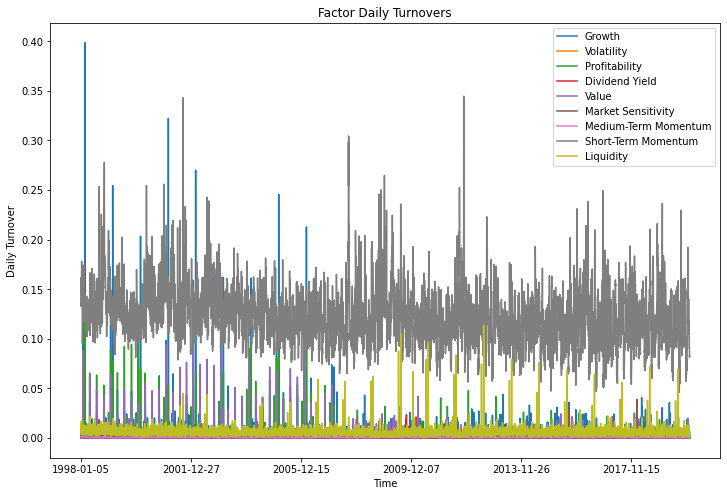

In [35]:
plt.figure(figsize=(12,8))
for f in tqdm(turnovers.columns):
    plt.plot(dates[1:], turnovers[f], label=f)
plt.xticks(np.arange(0, len(dates), 1000))
plt.xlabel('Time')
plt.ylabel('Daily Turnover')
plt.title('Factor Daily Turnovers')
plt.legend()
plt.show()

## e. Perform Cross-Sectional regression for the combined factor universe, plot their returns and compute Annual Returns and Sharpe Ratios. Use the specific risk in the dataset for the weights.

In [7]:
import numpy as np
import statsmodels.api as sm

m = len(factors)
T = len(dates)

F_new = np.zeros((m, T))
e_new = {}

i = 0
for date, group_df in tqdm(grouped):
    df_temp = group_df[group_df['ID'].isin(universe_dict_LIQ[date])]
    
    X = B_new[date].values # Use orthogonalized factor loadings
    y = df_temp['Total Return'].values
    W = np.diag(1 / df_temp['Specific Risk'])

    f = np.linalg.inv(X.T @ W @ X) @ X.T @ W @ y
    F_new[:, i] = f
#     e_new[date] = y - (X @ f.reshape(-1, 1)).flatten()
    
    i += 1

100%|██████████████████████████████████████████████████████████████████████████████| 5535/5535 [04:12<00:00, 21.88it/s]


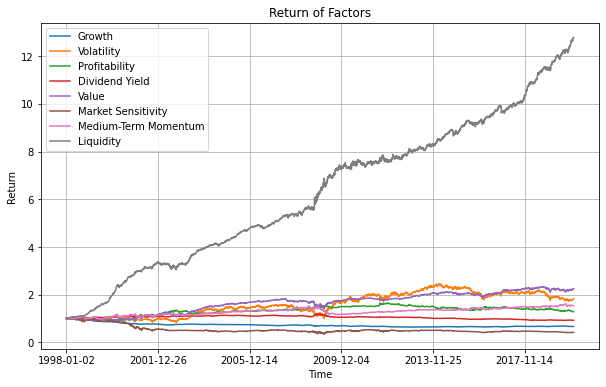

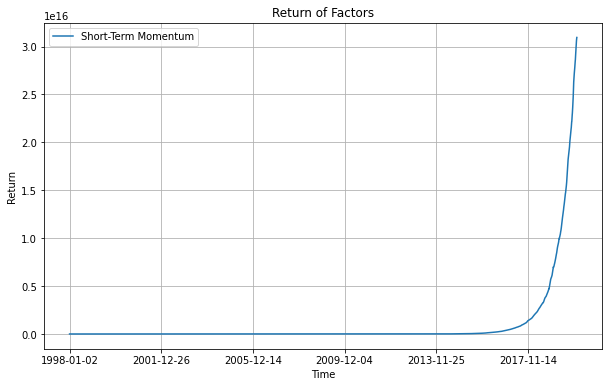

In [43]:
import matplotlib.pyplot as plt

factorCumReturns = np.cumprod(1 + F_new, axis=1)

df_factorCumReturns = pd.DataFrame(factorCumReturns, index=factors, columns=dates)

plt.figure(figsize=(10, 6))
for idx, row in df_factorCumReturns.loc[lows, :].iterrows():    
    plt.plot(row, label=f'{idx}')

plt.title('Return of Factors')
plt.xticks(np.arange(0, len(dates), 1000))
plt.xlabel('Time')
plt.ylabel('Return')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(df_factorCumReturns.loc[high, :], label=high)

plt.title('Return of Factors')
plt.xticks(np.arange(0, len(dates), 1000))
plt.xlabel('Time')
plt.ylabel('Return')
plt.legend()
plt.grid(True)
plt.show()

### Annual Returns

In [46]:
def percent(value):
    return '{:.2%}'.format(value)

In [50]:
annualized_returns = (df_factorCumReturns.iloc[:, -1]-1) / (df_factorCumReturns.shape[1] / 252)
print(annualized_returns.map(percent))

Growth                                  -1.52%
Volatility                               3.75%
Profitability                            1.30%
Dividend Yield                          -0.34%
Value                                    5.68%
Market Sensitivity                      -2.64%
Medium-Term Momentum                     2.44%
Short-Term Momentum     140905515809601424.00%
Liquidity                               53.65%
Name: 2019-12-31, dtype: object


### Sharpe Ratio

In [51]:
sharpe = annualized_returns / (df_factorCumReturns.std(axis=1) * np.sqrt(252))
print(sharpe)

Growth                 -0.011980
Volatility              0.005079
Profitability           0.004540
Dividend Yield         -0.003420
Value                   0.008545
Market Sensitivity     -0.011305
Medium-Term Momentum    0.010532
Short-Term Momentum     0.023683
Liquidity               0.010991
dtype: float64


# Part 2

## a. Implement a QLIKE Test statistic based on Random Portfolios.

In [23]:
def ret_cov(s, selected_factors):
    i = 0
    grouped = df.groupby('date')
    for date, group_df in grouped:
        if i == s:
            df_temp = group_df[group_df['ID'].isin(universe_dict_LIQ[date])]
            B = df_temp[factors][selected_factors].values.reshape(-1,len(selected_factors))
            f = pd.DataFrame(F_new, index=factors).loc[selected_factors, :].iloc[:, i].values
            r = B @ f.reshape(-1, 1)
            W = np.diag(1 / df_temp['Specific Risk'])
            
            # return
            ret = r.flatten()

            # cov
            m = pd.DataFrame(F_new, index=factors).loc[selected_factors, :].shape[0]
            var_f_t = np.zeros((m, m))

            for j in range(i):
                f = pd.DataFrame(F_new, index=factors).loc[selected_factors, :].iloc[:, j].values
                var_f_t += np.outer(f, f)

            var_f_t /= i
            
            # Just take empirical covariance
            cov_f = var_f_t # - np.linalg.inv(B.T @ W @ B) / i
            cov = B @ cov_f @ B.T
            break
        else:
            pass

        i += 1
    
    return ret, cov_f, cov, B

In [24]:
def QLike(r_2, v):        
    return r_2 / v - np.log(r_2 / v) - 1

import random

def MSE(r_2, v):
    return v * (r_2 / v - 1)**2

def RandomPortfolio(eps, selected_factors, mode="QLike"):
    T = len(dates) - 1
    
    L_tot = 0
    n_iter = 0
    
    condition = True
    
    while condition:
        s = random.randint(1, T)
        
        ret, cov_f, cov, B = ret_cov(s, selected_factors)
        
        length = len(ret)
        
        w = np.random.normal(0, 1, length)
        w = w / np.linalg.norm(w)
        
        vol_proxy = np.dot(ret, w)**2
        vol_est = w @ cov @ w.reshape(-1, 1)
        vol_est = vol_est[0]
        
        if vol_est < 0:
            print("Negative vol", dates[s])
            continue
        if mode == "QLike":
            loss = QLike(vol_proxy, vol_est)
        elif mode == "MSE":
            loss = MSE(vol_proxy, vol_est)
            
        L_tot += loss
        n_iter += 1
        
        if QLike(vol_proxy, vol_est) / L_tot < eps:
            condition = False
    
    return L_tot / n_iter

In [25]:
L = RandomPortfolio(eps=0.001, selected_factors=factors, mode="QLike")
print(L)

1.1326787515944614


## b. Implement Minimum Variance Portfolios tests.

In [26]:
import numpy as np
from scipy.optimize import minimize

def MVP(factor, s):
    def obj_function(w, cov):
        return w @ cov @ w.reshape(-1, 1)

    def eq_constraint(w, b):
        return np.dot(w, b) - 1

    ret, cov_f, cov, B = ret_cov(s, factor)

    initial_guess = np.array([1/cov.shape[0]] * cov.shape[0])

    constraint_definition = {'type': 'eq', 'fun': eq_constraint, 'args': (B.flatten(),)}

    result = minimize(obj_function, initial_guess, args=(cov,), constraints=[constraint_definition])
    w_MVP = result.x

    # Return realized variance as a loss function
    return (w_MVP @ np.outer(ret, ret) @ w_MVP.reshape(-1, 1))[0]

In [27]:
import numpy as np
from scipy.optimize import minimize

def MVP2(selected_factors, s):
    def obj_function(w, cov):
        return w @ cov @ w.reshape(-1, 1)

    def eq_constraint(w):
        return np.sum(w) - 1

    ret, cov_f, cov, B = ret_cov(s, selected_factors)

    initial_guess = np.array([1/cov.shape[0]] * cov.shape[0])

    constraint_definition = {'type': 'eq', 'fun': eq_constraint}

    result = minimize(obj_function, initial_guess, args=(cov,), constraints=[constraint_definition])
    w_MVP = result.x

    # Return realized variance as a loss function
    return (w_MVP @ np.outer(ret, ret) @ w_MVP.reshape(-1, 1))[0]

### MVP for each factor

In [28]:
for s in range(252, 5000, 252*4):
    for i in range(len(factors)):
        print(factors[i], dates[s], MVP([factors[i]], s))

Growth 1999-01-04 7.784463796774602e-06
Volatility 1999-01-04 1.473844032719486e-05
Profitability 1999-01-04 1.283101416139824e-07
Dividend Yield 1999-01-04 1.1054592905128187e-05
Value 1999-01-04 1.7265908468463796e-06
Market Sensitivity 1999-01-04 1.3162445894541724e-05
Medium-Term Momentum 1999-01-04 9.265946413214377e-06
Short-Term Momentum 1999-01-04 5.492681005041644e-06
Liquidity 1999-01-04 1.446556298619264e-06
Growth 2003-01-08 3.1408264939593922e-06
Volatility 2003-01-08 2.1878090511264112e-05
Profitability 2003-01-08 1.1815740197168208e-05
Dividend Yield 2003-01-08 1.61822557226456e-07
Value 2003-01-08 1.0600560793314111e-05
Market Sensitivity 2003-01-08 8.544809635089886e-07
Medium-Term Momentum 2003-01-08 3.0612673601846494e-06
Short-Term Momentum 2003-01-08 6.395162330087104e-05
Liquidity 2003-01-08 8.640193913945775e-06
Growth 2007-01-10 1.6185920663805527e-06
Volatility 2007-01-10 1.5961522168875323e-06
Profitability 2007-01-10 1.386103589483542e-06
Dividend Yield 2007-

## c. Estimate factor covariance matrix and idio vols. Try different half-lives.

### Factor covariance matrix: Naive approach

In [29]:
m = F_new.shape[0]
factor_covariance = np.zeros((m, m))

for i in range(T):
    f = F_new[:, i]
    factor_covariance += np.outer(f, f)
    
factor_covariance /= T
factor_covariance

array([[ 2.36787031e-06, -2.68479349e-07, -8.06140370e-07,
        -5.59050076e-07,  4.11805371e-07,  3.93806963e-08,
         3.23123784e-07, -2.31361662e-06,  5.74140976e-08],
       [-2.68479349e-07,  5.44177721e-05, -1.26372411e-05,
        -7.78260674e-07,  2.00331506e-05,  3.94065987e-05,
         3.96181475e-06, -1.81927456e-06, -3.37029518e-06],
       [-8.06140370e-07, -1.26372411e-05,  9.39749368e-06,
         9.54123375e-08, -6.99757962e-06, -1.01095290e-05,
        -2.42479001e-06,  2.68370281e-06, -1.09962833e-06],
       [-5.59050076e-07, -7.78260674e-07,  9.54123375e-08,
         2.29564603e-06, -5.47342886e-07, -4.06885154e-07,
         2.18205085e-08,  1.04758199e-06,  7.77475851e-07],
       [ 4.11805371e-07,  2.00331506e-05, -6.99757962e-06,
        -5.47342886e-07,  1.57142203e-05,  1.84707087e-05,
         2.59086252e-06, -2.73676284e-06,  8.79584996e-07],
       [ 3.93806963e-08,  3.94065987e-05, -1.01095290e-05,
        -4.06885154e-07,  1.84707087e-05,  4.801313

If T is sufficiently large, we can naively take the empirical covariance matrix as covariance estimation.

In [32]:
# Can also estimate factor covariance daily

for s in range(252, 5000, 252*10):
    ret, cov_f, cov, B = ret_cov(s, factors)
    print(dates[s])
    print(cov_f)
    print()

1999-01-04
[[ 5.09481097e-06  6.34348990e-06 -5.16084739e-06 -4.09720367e-07
   6.72447708e-06  5.46419161e-06 -3.54546069e-06 -5.78755794e-06
   2.51667145e-06]
 [ 6.34348990e-06  1.51448897e-05 -8.00168467e-06 -2.27243903e-07
   1.29717881e-05  1.10682913e-05 -5.59843144e-06 -9.51572970e-06
   5.95848934e-06]
 [-5.16084739e-06 -8.00168467e-06  9.77937164e-06  6.74181026e-07
  -8.92678192e-06 -7.03521774e-06  5.18433361e-06  4.80174487e-06
  -5.24784413e-06]
 [-4.09720367e-07 -2.27243903e-07  6.74181026e-07  1.11978582e-06
  -8.81509044e-07  4.35868828e-07  8.99869020e-07  1.12857678e-06
  -7.07306785e-08]
 [ 6.72447708e-06  1.29717881e-05 -8.92678192e-06 -8.81509044e-07
   1.65736315e-05  1.05124130e-05 -6.29397872e-06 -1.11162407e-05
   5.61015877e-06]
 [ 5.46419161e-06  1.10682913e-05 -7.03521774e-06  4.35868828e-07
   1.05124130e-05  1.32869493e-05 -7.67572628e-06 -8.31100965e-06
   4.58654674e-06]
 [-3.54546069e-06 -5.59843144e-06  5.18433361e-06  8.99869020e-07
  -6.29397872e-06

### Factor covariance matrix: Dynamic Conditional Correlation

In [230]:
from scipy.optimize import minimize

def obj_func(x, F, cov_f):
    K_V = x[0]
    K_C = x[1]
    tau_V = x[2]
    tau_C = x[3]
    
    T = 252
    
    error = 0
    for i in range(300, F.shape[1], 252):
        
        V_2 = np.zeros_like(cov_f)
        C = np.zeros_like(cov_f)

        for j in range(T):
            f = F[:, i - j]
            V_2 += np.exp(-j / tau_V) * np.outer(f, f)
            
        V_2 = np.diag(np.diag(K_V * V_2))
        V = np.sqrt(V_2)
        
        for j in range(T):
            f = F[:, i - j]
            C += np.exp(-j / tau_C) * np.linalg.inv(V) @ np.outer(f, f) @ np.linalg.inv(V)
        C *= K_C
        
        error += np.sum(((cov_f - V @ C @ V)**2).flatten())
        
    return error / len(range(300, F.shape[1], 252))

def constraint(x):
    return x[2] - x[3]  # Constraint: x1 + x2 + x3 + x4 <= 5

initial_guess = [1, 1, 10, 10]

constraint_dict = {'type': 'ineq', 'fun': constraint}

# Perform optimization with constraints
result = minimize(obj_func, initial_guess, method='SLSQP', args=(F_new, factor_covariance), constraints=[constraint_dict])

# Print results
K_V, K_C, tau_V, tau_C = result.x
print("K_V:", K_V)
print("K_C:", K_C)
print("tau_V:", tau_V)
print("tau_C:", tau_C)
print("Minimum value:", result.fun)


K_V: 1.0
K_C: 1.0
tau_V: 10.0
tau_C: 10.0
Minimum value: 9.645011013292295e-06


We can make V and C with the parameters with the lookback period of 252 days.

In [232]:
def VCV(params, F, s):
    K_V, K_C, tau_V, tau_C = params
    V_2 = np.zeros_like(cov_f)
    C = np.zeros_like(cov_f)
    T = 252
    
    for j in range(T):
        f = F[:, s-j]
        V_2 += np.exp(-j / tau_V) * np.outer(f, f)

    V_2 = np.diag(np.diag(K_V * V_2))
    V = np.sqrt(V_2)

    for j in range(T):
        f = F[:, s-j]
        C += np.exp(-j / tau_C) * np.linalg.inv(V) @ np.outer(f, f) @ np.linalg.inv(V)
    C *= K_C
    
    return V @ C @ V

In [233]:
def VCV_error(params):
    error = 0
    for s in range(300, F_new.shape[1], 252):
        error += np.linalg.norm(factor_covariance - VCV(params, F_new, s))
    return error / len(range(300, F_new.shape[1], 252))

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:13<00:00,  1.32s/it]


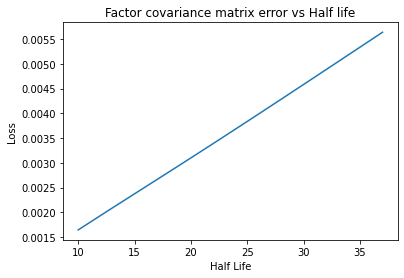

In [234]:
error_li = []
half_life_li = list(range(10, 40, 3))
for i in tqdm(half_life_li):
    error_li.append(VCV_error([1,1, i, i]))
    
plt.plot(half_life_li, error_li)
plt.title("Factor covariance matrix error vs Half life")
plt.xlabel("Half Life")
plt.ylabel("Loss")
plt.show()

Based on the upper code, the loss increases as half-life increases. However, since we fixed $\kappa$s, we cannot say whether increasing the half life would increase the loss or not.

### Idio vols

In [72]:
def idio_vol(halflife):
    window = 252
    i = 0
    R = pd.DataFrame({})
    rmse_li = []
    for date, group_df in tqdm(grouped):
        ret = group_df[['ID', 'Total Return']]
        ret = ret.set_index('ID')
        ret = ret.rename(columns={'Total Return':date})

        R = pd.concat([R, ret], axis=1)

        if i < window:
            i += 1
            continue
        else:
            if i % 100 == 0: # Track per 100 days
                R_t = R[R.index.isin(universe_dict_LIQ[date])].iloc[:, -window:].copy().dropna()
                ewma_vol = R_t.ewm(halflife=halflife, axis=1).std().iloc[:, -1]
                
                # We can make idio vol matrix with these values.
                ewma_vol = ewma_vol * 100 * np.sqrt(252)

                risk = group_df[['ID', 'Specific Risk']][group_df['ID'].isin(universe_dict_LIQ[date])]
                risk = risk.set_index('ID')
                
                R = R_t.copy()
                
                R_t = R_t.join(risk, how='inner')
                risk = R_t['Specific Risk']

                rmse = np.sqrt(np.mean((risk.values - ewma_vol.values)**2))
                rmse_li.append(rmse)
                
            i += 1
    
    return np.mean(rmse_li), np.std(rmse_li)

### Under different half-lives

In [73]:
idio_vol_252 = idio_vol(252)
print(idio_vol_252)

100%|██████████████████████████████████████████████████████████████████████████████| 5535/5535 [01:19<00:00, 69.67it/s]


(14.646635944901229, 7.888965750518783)


In [74]:
idio_vol_126 = idio_vol(126)
print(idio_vol_126)

100%|██████████████████████████████████████████████████████████████████████████████| 5535/5535 [01:17<00:00, 71.22it/s]


(14.62993791059586, 8.194006237783215)


In [75]:
idio_vol_63 = idio_vol(63)
print(idio_vol_63)

100%|██████████████████████████████████████████████████████████████████████████████| 5535/5535 [01:19<00:00, 69.91it/s]


(14.681445451531845, 8.894842279388937)


In [76]:
idio_vol_22 = idio_vol(22)
print(idio_vol_22)

100%|██████████████████████████████████████████████████████████████████████████████| 5535/5535 [01:28<00:00, 62.31it/s]

(15.319066495801247, 10.20330000891268)


The mean of the RMSEs and the standard deviation of the RMSEs increase as half-life decreases. Thus, it is better to use longer half-life.

## d. Test the performance of the model under the QLIKE, MSE and Min Variance Portfolios for the first cluster, and then the second cluster.

In [39]:
lows

['Growth',
 'Volatility',
 'Profitability',
 'Dividend Yield',
 'Value',
 'Market Sensitivity',
 'Medium-Term Momentum',
 'Liquidity']

In [34]:
L = RandomPortfolio(eps=0.001, selected_factors=lows, mode="QLike")
print(L)

0.6525195332855285


In [36]:
L = RandomPortfolio(eps=0.001, selected_factors=lows, mode="MSE")
print(L)

0.005484895576403803


In [40]:
high

'Short-Term Momentum'

In [35]:
L = RandomPortfolio(eps=0.001, selected_factors=[high], mode="QLike")
print(L)

0.3461819210015259


In [37]:
L = RandomPortfolio(eps=0.001, selected_factors=[high], mode="MSE")
print(L)

0.0030083909242336125


In [38]:
for s in range(252, 5000, 252*4):
    print("High", dates[s], MVP2([high], s))
    print("Low", dates[s], MVP2(lows, s))

High 1999-01-04 1.600051465731798e-08
Low 1999-01-04 7.108142109951057e-07
High 2003-01-08 5.487792403804051e-08
Low 2003-01-08 5.016273041625895e-08
High 2007-01-10 2.9012431429953143e-07
Low 2007-01-10 1.63593275592356e-07
High 2011-01-10 6.243734411491389e-08
Low 2011-01-10 1.019882711474352e-07
High 2015-01-13 6.499776198588951e-07
Low 2015-01-13 8.18915207762519e-09


## e. Optional: apply shrinkage to covariance matrix, dynamic vol adjustment, and Newey-West correction.

### Apply shrinkage to covariance matrix

In [219]:
def shrink_cov(rho, cov):
    return (1 - rho) * cov + rho * (np.trace(cov)) / cov.shape[0] * np.eye(cov.shape[0])

100%|███████████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 20941.60it/s]


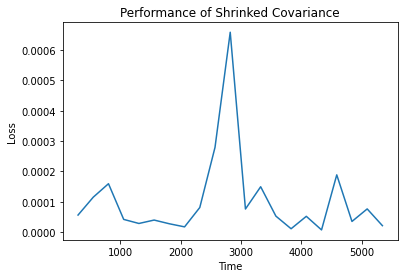

In [224]:
error_li = []
s_li = list(range(300, F_new.shape[1], 252))
for s in tqdm(s_li):
    cov = np.outer(F_new[:, s], F_new[:, s])
    error_li.append(np.linalg.norm(cov - shrink_cov(0.5, cov)))
    
plt.plot(s_li, error_li)
plt.title("Performance of Shrinked Covariance")
plt.xlabel("Time")
plt.ylabel("Loss")
plt.show()

### Adjustment to Changes in Factor Volatility

In [198]:
def f_t(params, F, s):
    K_V, K_C, tau_V, tau_C = params
    V_2 = np.zeros_like(cov_f)
    C = np.zeros_like(cov_f)
    T = 252
    
    for j in range(T):
        f = F[:, s-j]
        V_2 += np.exp(-j / tau_V) * np.outer(f, f)

    V_2 = np.diag(np.diag(K_V * V_2))
    V = np.sqrt(V_2)

    for j in range(T):
        f = F[:, s-j]
        C += np.exp(-j / tau_C) * np.linalg.inv(V) @ np.outer(f, f) @ np.linalg.inv(V)
    C *= K_C
    
    # u
    u = np.linalg.inv(V) @ fractional_matrix_power(C, -0.5) @ F[:, s].reshape(-1, 1)
    
    # eta
    eta = np.random.normal(0, 1, len(u_vec))
    
    # x
    x = np.log(np.linalg.norm(u_vec)**2) - np.log(np.linalg.norm(eta)**2)
    
    return (np.exp(x/2) * fractional_matrix_power(C, 0.5) @ V @ eta.reshape(-1, 1)).flatten()

In [199]:
f_t([1,1,15,15], F_new, 1700)

array([-0.00626338,  0.01648582, -0.00436372,  0.00120172,  0.01031809,
        0.01324647, -0.00126834,  0.0100866 ,  0.00166283])

In [226]:
def adj_vol_error(params, s):
    error = 0

    f = f_t([1,1,15,15], F_new, s)
    error += np.linalg.norm(factor_covariance - np.outer(f, f))
    return error

100%|██████████████████████████████████████████████████████████████████████████████████| 21/21 [00:01<00:00, 13.42it/s]


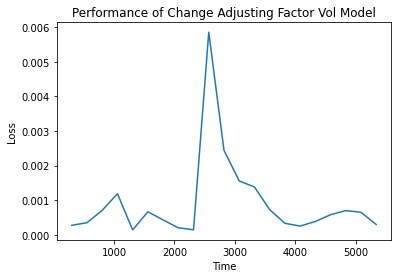

In [227]:
error_li = []
s_li = list(range(300, F_new.shape[1], 252))
for s in tqdm(s_li):
    error_li.append(adj_vol_error([1,1, 15, 15], s))
    
plt.plot(s_li, error_li)
plt.title("Performance of Change Adjusting Factor Vol Model")
plt.xlabel("Time")
plt.ylabel("Loss")
plt.show()

## Newey-West correction

In [212]:
# Newey-West Correction
lmax = 252  
    
def Newey_West(s):
    C = np.zeros((F_new.shape[0], F_new.shape[0]))
    
    for l in range(1, lmax+1):
        C_l = np.outer(F_new[:, s], F_new[:, s-l])
        C += C_l
        C += C_l.T
    
    return np.outer(F_new[:, s], F_new[:, s]) + C / 2

In [228]:
def Newey_West_error(s):
    error = 0
    cov_f = Newey_West(s)
    error += np.linalg.norm(factor_covariance - cov_f)
    return error

100%|█████████████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 477.28it/s]


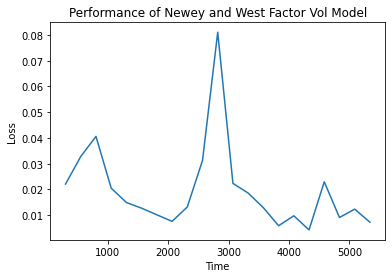

In [229]:
error_li = []
s_li = list(range(300, F_new.shape[1], 252))
for s in tqdm(s_li):
    error_li.append(Newey_West_error(s))
    
plt.plot(s_li, error_li)
plt.title("Performance of Newey and West Factor Vol Model")
plt.xlabel("Time")
plt.ylabel("Loss")
plt.show()